Type of img 0: uint8
Shape of img 0: (1424, 2144, 3)
Min val of img 0: 0
Max val of img 0: 255


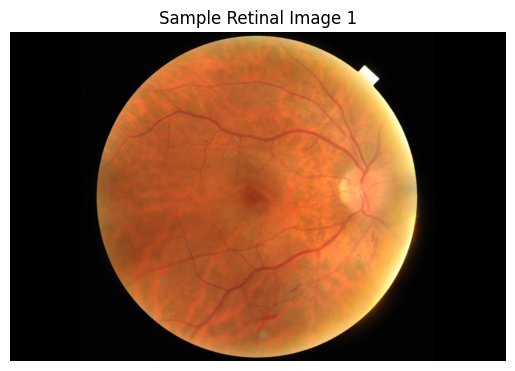

Type of img 1: uint8
Shape of img 1: (1536, 2048, 3)
Min val of img 1: 0
Max val of img 1: 255


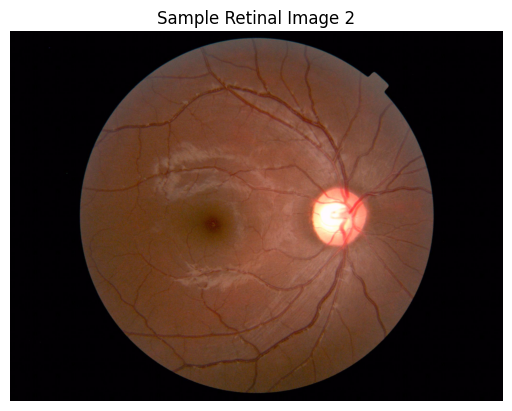

Type of img 2: uint8
Shape of img 2: (1536, 2048, 3)
Min val of img 2: 0
Max val of img 2: 255


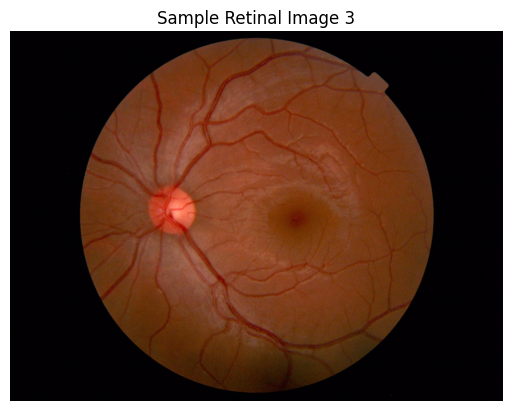

Type of img 3: uint8
Shape of img 3: (1424, 2144, 3)
Min val of img 3: 0
Max val of img 3: 255


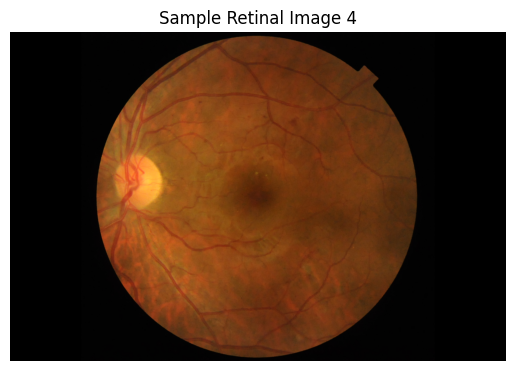

Type of img 4: uint8
Shape of img 4: (1424, 2144, 3)
Min val of img 4: 0
Max val of img 4: 255


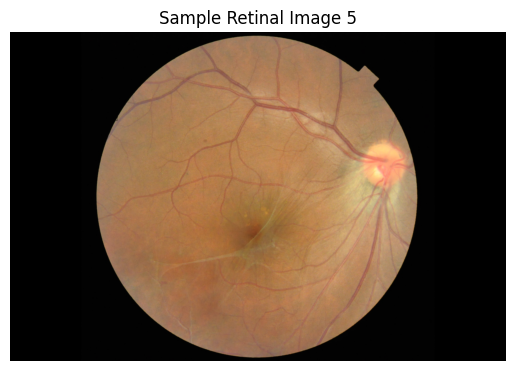

Type of img 5: uint8
Shape of img 5: (1424, 2144, 3)
Min val of img 5: 0
Max val of img 5: 255


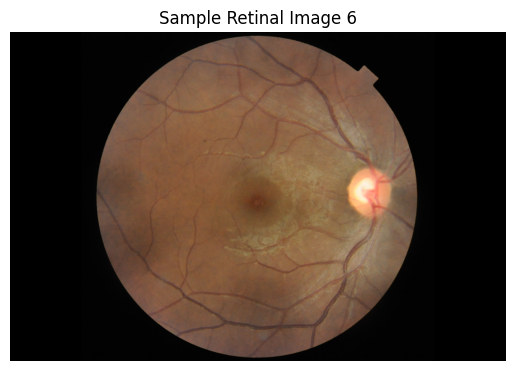

Type of img 6: uint8
Shape of img 6: (1536, 2048, 3)
Min val of img 6: 0
Max val of img 6: 255


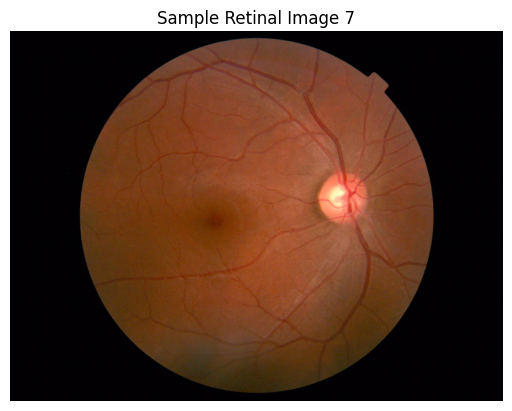

Type of img 7: uint8
Shape of img 7: (1424, 2144, 3)
Min val of img 7: 0
Max val of img 7: 255


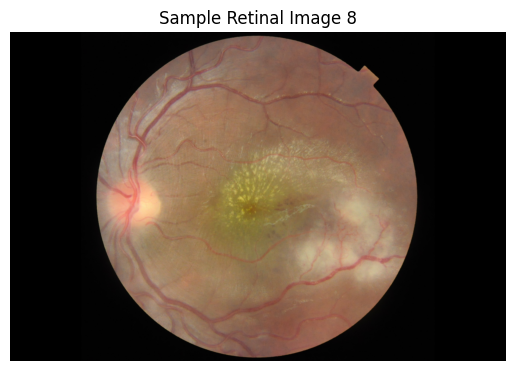

Type of img 8: uint8
Shape of img 8: (1424, 2144, 3)
Min val of img 8: 0
Max val of img 8: 255


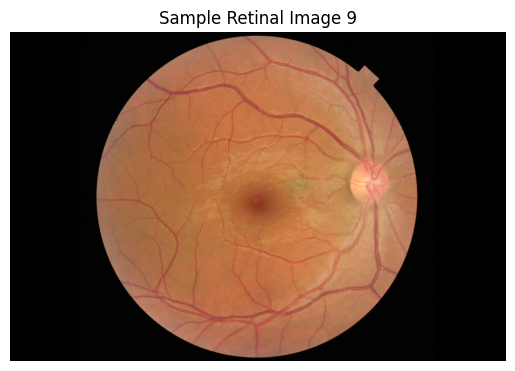

Type of img 9: uint8
Shape of img 9: (1424, 2144, 3)
Min val of img 9: 0
Max val of img 9: 199


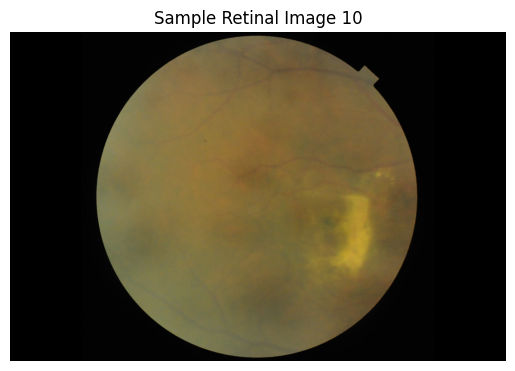

In [25]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train_labels = pd.read_csv("../data/raw/Training_Set/RFMiD_Training_Labels.csv")
#Setting training data path
train_path = "../data/raw/Training_Set/Training/"

#Checking image sizes
for i in range(10):
    test_img_name = os.listdir(train_path)[i]
    test_img_path = os.path.join(train_path, test_img_name)
    test_img = Image.open(test_img_path)
    test_img_arr = np.array(test_img)

    print(f'Type of img {i}: {test_img_arr.dtype}')
    print(f'Shape of img {i}: {test_img_arr.shape}')
    print(f'Min val of img {i}: {test_img_arr.min()}')
    print(f'Max val of img {i}: {test_img_arr.max()}')

    plt.imshow(test_img_arr)
    plt.title(f"Sample Retinal Image {i+1}")
    plt.axis('off')  
    plt.show()



In [21]:
def process_image(img_path, show=False):
    img = Image.open(img_path)
    resized_img = img.resize((512, 512), Image.Resampling.LANCZOS)
    resized_img_arr = np.array(resized_img)
    normalized_img = resized_img_arr / 255.0 

    if show:
        plt.imshow(normalized_img)
        plt.title(f"Resized to 512x512")
        plt.axis('off')
        plt.show()
    
    return normalized_img

In [23]:
processed_imgs = {}
for idx, img_name in enumerate(os.listdir(train_path)):
    img_id = int(img_name.split('.')[0])  
    img_path = os.path.join(train_path, img_name)
    processed_imgs[img_id] = process_image(img_path)

    if (idx+1) % 100 == 0:
        print(f'Processed {idx+1} images')

print('Finished!')

Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images
Processed 1000 images
Processed 1100 images
Processed 1200 images
Processed 1300 images
Processed 1400 images
Processed 1500 images
Processed 1600 images
Processed 1700 images
Processed 1800 images
Processed 1900 images
Finished!


In [29]:
# Holds images
X = []
# Holds list of labels for each image
y = []

for idx, row in train_labels.iterrows():
    img_id = row['ID']

    if img_id in processed_imgs:
        X.append(processed_imgs[img_id])
        img_labels = row[2:47].values
        y.append(img_labels)

X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}") 

X shape: (1920, 512, 512, 3)
y shape: (1920, 45)


In [30]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,  
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")

Training set: (1536, 512, 512, 3), (1536, 45)
Validation set: (384, 512, 512, 3), (384, 45)
